### For the extended part of your take-home code challenge, you should perform an _Inferential EDA_ on the following dataset:

🍷 [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data-130k-v2.csv) 🔍

### You need to accomplish the following objectives:

- Perform at least three (3) data processing/cleaning techniques.
- Use sampling to reduce the dataset's size from 130k rows to less-than-100k rows.
  - Your sampling method should NOT dramatically affect the data's original distributions. In other words, the sampling should be somewhat random but also take into account the original data distributions.
- Clean/impute all null values using whatever techniques you deem necessary.
  - Justify your chosen technique(s).
- Ask and answer at least five (5) descriptive analysis questions.
- Ask and answer at least three (3) inferential analysis questions; you may use the following array of hypothesis testing techniques (you are not limited to these, but these are recommended to start with):
  - Student's t-Tests (1-sample, 2-sample)
  - ANOVA Tests (one-way, two-way)
  - Chi-Squared Tests (independence, goodness-of-fit)
  - Any additional hypothesis tests from [this article](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)
- Produce at least two (2) strong storytelling-oriented data visualizations to showcase any of the descriptive or inferential findings you have gathered.
- Write a short summary section at the bottom of your notebook that summarizes the extent of your data investigation.
  - In particular, ensure you interpret your inferential hypothesis tests adequately in this section.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('data/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


----
## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
df.shape

(129971, 14)

In [7]:
df.country.value_counts(dropna=False)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
NaN                          63
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine 

In [8]:
# replace all null values in country with Unknown
df['country'] = df['country'].fillna('Unknown')

In [9]:
df['variety'] = df['variety'].fillna('Unknown')
df['province'] = df['province'].fillna('Unknown')

In [10]:
df['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [11]:
df['taster_name'] = df['taster_name'].fillna('Anonymous')

We are cleaning up the data in a way that makes sense. For country and variety, there were a small number of items missing, so setting to unknown is useful because we can simply mask unknown values or we can categorize a region as unknown.

For Taster Name I set them as anonymous since their name wasn't provided. We can continue to use these rows, but we will group them as anonymous

In [12]:
df['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [13]:
df['price'].value_counts()

20.0      6940
15.0      6066
25.0      5805
30.0      4951
18.0      4883
          ... 
216.0        1
247.0        1
1900.0       1
602.0        1
820.0        1
Name: price, Length: 390, dtype: int64

In [14]:
mean_price = df['price'].mean()

mode_price = df['price'].mode()[0]
median_price = df['price'].median()

mode_price, median_price, mean_price

(20.0, 25.0, 35.363389129985535)

In [15]:
df_clean = df.copy()

In [16]:
# create a new dataset where all NaN prices are dropped
df_clean = df_clean.dropna(subset=['price'])

In [17]:
#udpate df_clean so it only has columns country, price, points, province, taster_name, variety, winery
df_clean = df_clean[['country', 'price', 'points', 'province', 'taster_name', 'variety', 'winery']]


Now we can grab a sample of this data set to get a closer look. Let's work with a 6000.

In [18]:
df_sample = df_clean.sample(n=6000, random_state=42)

In [19]:
mean_price = df_sample['price'].mean()

mode_price = df_sample['price'].mode()[0]
median_price = df_sample['price'].median()

print(f'Mode: {mode_price}, Median: {median_price}, Mean: {mean_price}')

Mode: 20.0, Median: 25.0, Mean: 35.744166666666665


In [20]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 30391 to 24925
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      6000 non-null   object 
 1   price        6000 non-null   float64
 2   points       6000 non-null   int64  
 3   province     6000 non-null   object 
 4   taster_name  6000 non-null   object 
 5   variety      6000 non-null   object 
 6   winery       6000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 375.0+ KB


_____

## Descriptive Analysis

### What are the countries with the most expensive wines?

In [29]:
top_countries_for_price = df_sample.groupby('country')['price'].mean().sort_values(ascending=False).head(10)


In [30]:
top_countries_for_price

country
Hungary           121.777778
Uruguay            70.000000
Lebanon            63.000000
England            58.333333
Czech Republic     45.000000
Germany            44.116071
France             41.726136
Italy              40.700946
Australia          38.372881
US                 36.640613
Name: price, dtype: float64

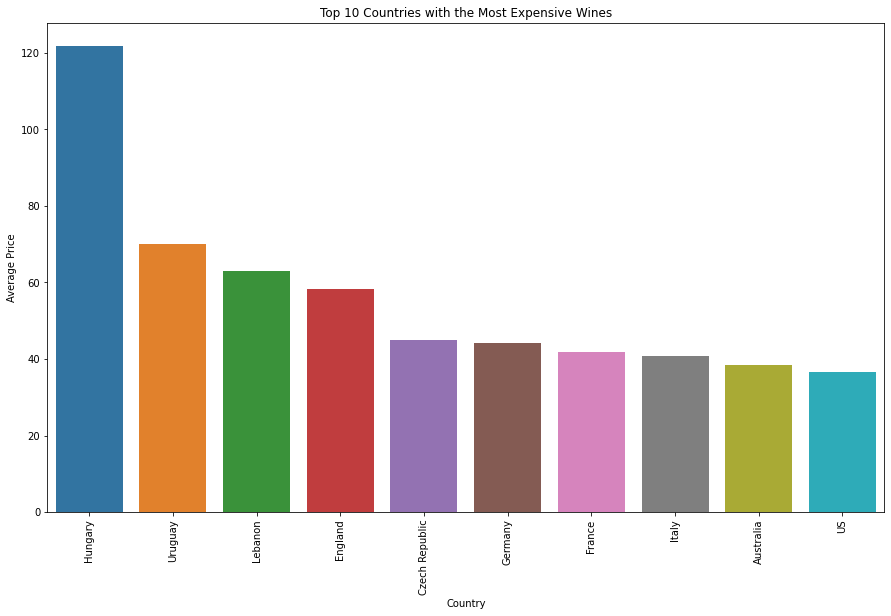

In [79]:
plt.figure(figsize=(15,9))

sns.barplot(x=top_countries_for_price.index, y=top_countries_for_price.values)

plt.xticks(rotation=90)
plt.title('Top 10 Countries with the Most Expensive Wines')
plt.xlabel('Country')
plt.ylabel('Average Price')

plt.show()

### What are the most common wines?

In [69]:
top_10_wines = df_sample['variety'].value_counts().head(10)

top_10_list = top_10_wines.index.tolist()

top_10_wines_df = df_sample[df_sample['variety'].isin(top_10_list)]


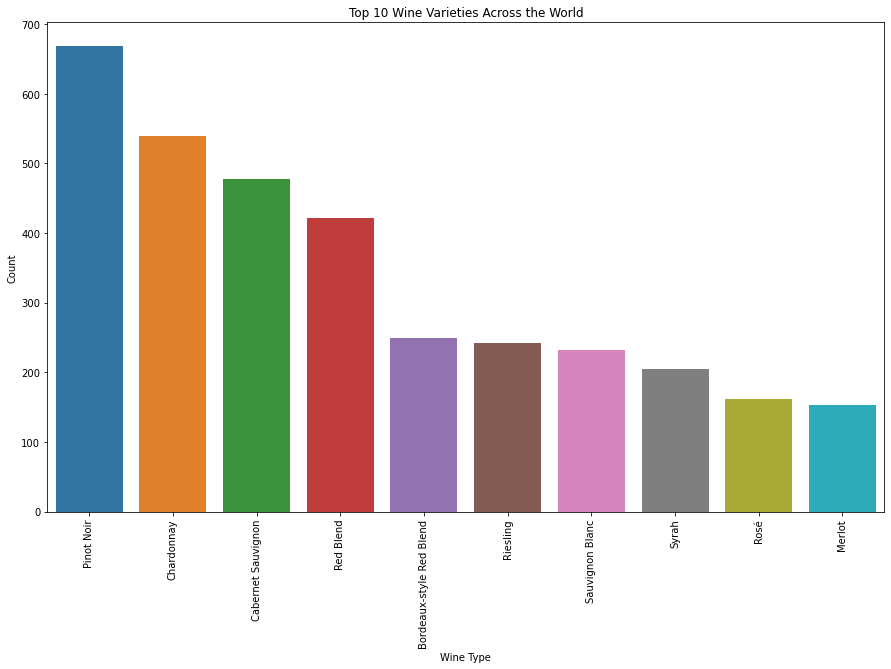

In [72]:
plt.figure(figsize=(15,9))

sns.barplot(x=top_10_wines.index, y=top_10_wines.values)
plt.xticks(rotation=90)
plt.title('Top 10 Wine Varieties Across the World')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.show()


### Does Wine Variety have an impact on Price and Points?

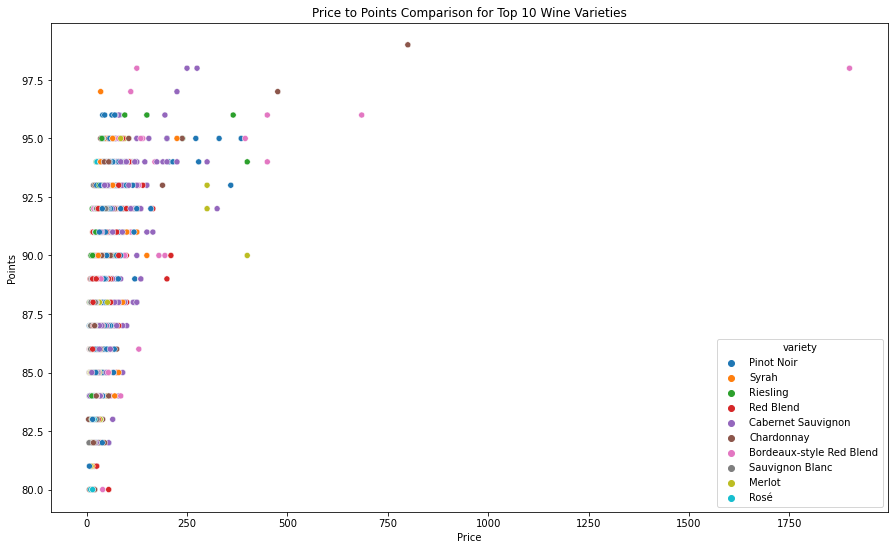

In [78]:
plt.figure(figsize=(15,9))

sns.scatterplot(data=top_10_wines_df, x='price', y='points', hue='variety', sizes=100)

plt.title('Price to Points Comparison for Top 10 Wine Varieties')
plt.xlabel('Price')
plt.ylabel('Points')

plt.show()

### Where are these wine varieties most prevelant based off country?

In [86]:
#create a mask to not show any countries that are unknown
mask = top_10_wines_df['country'] != 'Unknown'

top_10_wines_df = top_10_wines_df[mask]

top_wines_by_country = top_10_wines_df.groupby('variety')['country'].value_counts()

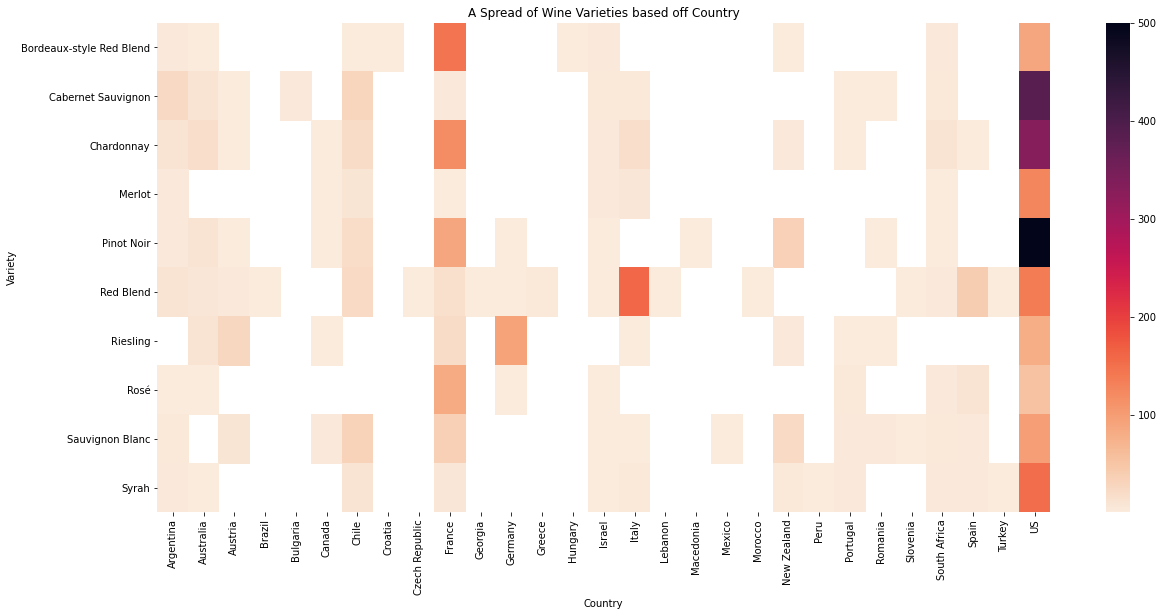

In [87]:
plt.figure(figsize=(20,9))

sns.heatmap(top_wines_by_country.unstack(), cmap='rocket_r')

plt.title('A Spread of Wine Varieties based off Country')
plt.xlabel('Country')
plt.ylabel('Variety')

plt.show()

This sample really does favor the US.

### How do tasters vary in terms of their rating?

In [88]:
df_sample.groupby('taster_name')['points'].mean().sort_values(ascending=False)

taster_name
Anne Krebiehl MW      90.309091
Matt Kettmann         89.686007
Virginie Boone        89.284836
Paul Gregutt          89.140044
Jim Gordon            89.009479
Sean P. Sullivan      88.823770
Kerin O’Keefe         88.779559
Joe Czerwinski        88.659004
Roger Voss            88.645685
Mike DeSimone         88.548387
Jeff Jenssen          88.391304
Anna Lee C. Iijima    88.287611
Anonymous             87.779717
Lauren Buzzeo         87.263736
Fiona Adams           87.000000
Carrie Dykes          87.000000
Michael Schachner     86.942743
Susan Kostrzewa       86.837209
Alexander Peartree    85.947368
Name: points, dtype: float64

In [97]:
def points_by_taster(taster_name):
    taster_df = df_sample[df_sample['taster_name'] == taster_name]
    plt.figure(figsize=(12,8))

    sns.histplot(taster_df['points'], bins=10, kde=True)
    plt.axvline(taster_df['points'].mean(), color='red', linestyle='dashed', linewidth=2)

    plt.title(f'Distribution of Points Assigned by {taster_name}')

    plt.show()

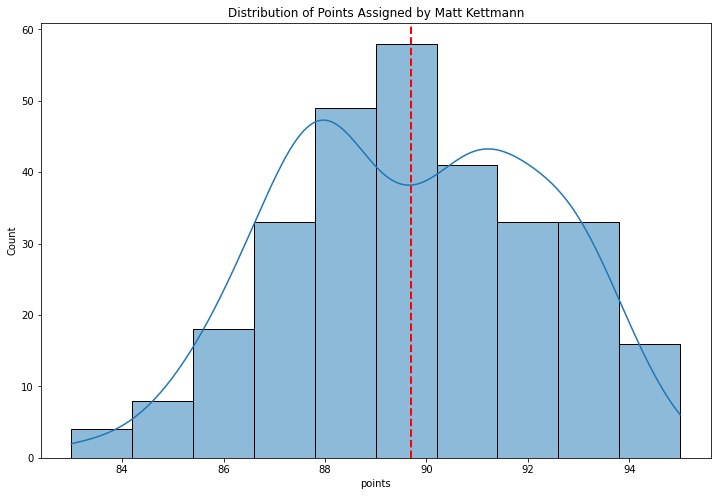

In [98]:
points_by_taster('Matt Kettmann')

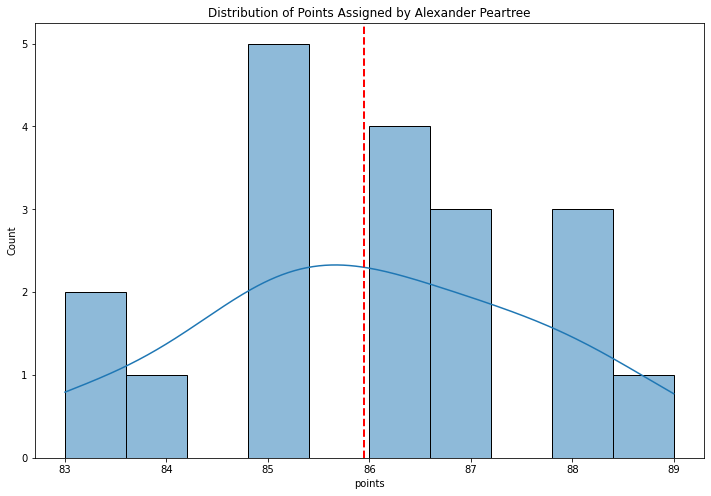

In [99]:
points_by_taster('Alexander Peartree')

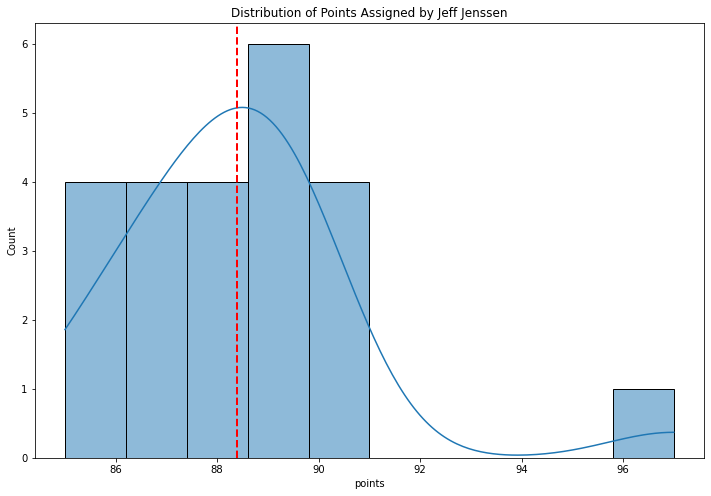

In [100]:
points_by_taster('Jeff Jenssen')

------
## Inferential Analysis

### H0: A taster doesn't have a signicant difference on the points alloted to a wine variety
### HA: A taster will give a wine variety different point values

In [105]:
# Our confidence level will be 80%
alpha = 0.20

# let's grab two tasters
matt_kettmann_df = df_sample[df_sample['taster_name'] == 'Matt Kettmann']
virginia_boon_df = df_sample[df_sample['taster_name'] == 'Virginie Boone']

# let's grab a wine variety
pinot_noir_matt = matt_kettmann_df[matt_kettmann_df['variety'] == 'Pinot Noir']['points']
pinot_noir_virginia = virginia_boon_df[virginia_boon_df['variety'] == 'Pinot Noir']['points']

# let's run a t-test
_,p_value = stats.ttest_ind(pinot_noir_matt, pinot_noir_virginia, equal_var=False)

print(p_value)
#let's compare our alpha with the p_value
if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

0.6543568457755129
We fail to reject the null hypothesis


We can create a function to test more tasters

In [122]:
def ttest_taster(alpha, taster01, taster02, variety):
    """
    Provide the alpha value, the names of two tasters and the variety of wine
    """

    alpha = alpha

    # let's grab two tasters
    taster01_df = df_sample[df_sample['taster_name'] == taster01]
    taster02_df = df_sample[df_sample['taster_name'] == taster02]

    # let's grab a wine variety
    variety_taster01 = taster01_df[taster01_df['variety'] == variety]['points']
    variety_taster02 = taster02_df[taster02_df['variety'] == variety]['points']

    # let's run a t-test
    _,p_value = stats.ttest_ind(variety_taster01, variety_taster02)

    print(p_value)
    #let's compare our alpha with the p_value
    if p_value < alpha:
        print('We reject the null hypothesis')
    else:
        print('We fail to reject the null hypothesis')

In [109]:
df_sample['taster_name'].unique()

array(['Lauren Buzzeo', 'Anonymous', 'Paul Gregutt', 'Anna Lee C. Iijima',
       'Roger Voss', 'Alexander Peartree', 'Jim Gordon', 'Matt Kettmann',
       'Kerin O’Keefe', 'Sean P. Sullivan', 'Mike DeSimone',
       'Michael Schachner', 'Virginie Boone', 'Anne Krebiehl\xa0MW',
       'Joe Czerwinski', 'Jeff Jenssen', 'Susan Kostrzewa',
       'Carrie Dykes', 'Fiona Adams'], dtype=object)

In [131]:
top_10_wines_df['variety'].unique()

array(['Pinot Noir', 'Syrah', 'Riesling', 'Red Blend',
       'Cabernet Sauvignon', 'Chardonnay', 'Bordeaux-style Red Blend',
       'Sauvignon Blanc', 'Merlot', 'Rosé'], dtype=object)

In [123]:
ttest_taster(.10, 'Jim Gordon', 'Sean P. Sullivan', 'Merlot')

0.6112807137141028
We fail to reject the null hypothesis


In [132]:
ttest_taster(.10, 'Jim Gordon', 'Sean P. Sullivan', 'Syrah')

0.6079356395276754
We fail to reject the null hypothesis


In [135]:
ttest_taster(.20, 'Fiona Adams', 'Virginie Boone', 'Cabernet Sauvignon')

0.15495018752149653
We reject the null hypothesis


With a couple tests it seems more likely that we are unable to reject the null hypothesis

### H0: A country doesn't impact the score it will receive
### HA: A country will have a impact on the score it will receive

In [136]:
# We will use a 95% confidence level.
alpha = 0.05

# Perform one-way ANOVA test
fvalue, pvalue = stats.f_oneway(df_sample['points'][df_sample['country'] == 'US'],
                                df_sample['points'][df_sample['country'] == 'France'],
                                df_sample['points'][df_sample['country'] == 'Italy'])

# Print the results
print(f"F-statistic: {fvalue:.2f}")
print(f"P-value: {pvalue:.3f}")

# Compare p-value to alpha
if pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean points awarded to wines from different countries.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean points awarded to wines from different countries.")

F-statistic: 1.17
P-value: 0.310
Fail to reject the null hypothesis. There is no significant difference in the mean points awarded to wines from different countries.


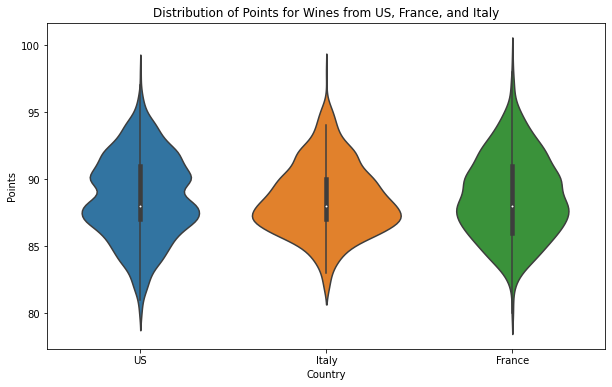

In [138]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='country', y='points', data=df_sample[df_sample['country'].isin(['US', 'France', 'Italy'])])
plt.title('Distribution of Points for Wines from US, France, and Italy')
plt.xlabel('Country')
plt.ylabel('Points')
plt.show()

### H0: There is no signicant difference between the price of wine in france and the US
### HA: There is a significant difference between the price of wine in France and the US


In [139]:
#let's grab the prices of wine in France and the US
france_prices = df_sample[df_sample['country'] == 'France']['price']
us_prices = df_sample[df_sample['country'] == 'US']['price']

#our alpha is 85% confidence
alpha = 0.15

#let's run a t-test
_,p_value = stats.ttest_ind(france_prices, us_prices, equal_var=False)

#let's compare our alpha with the p_value
if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


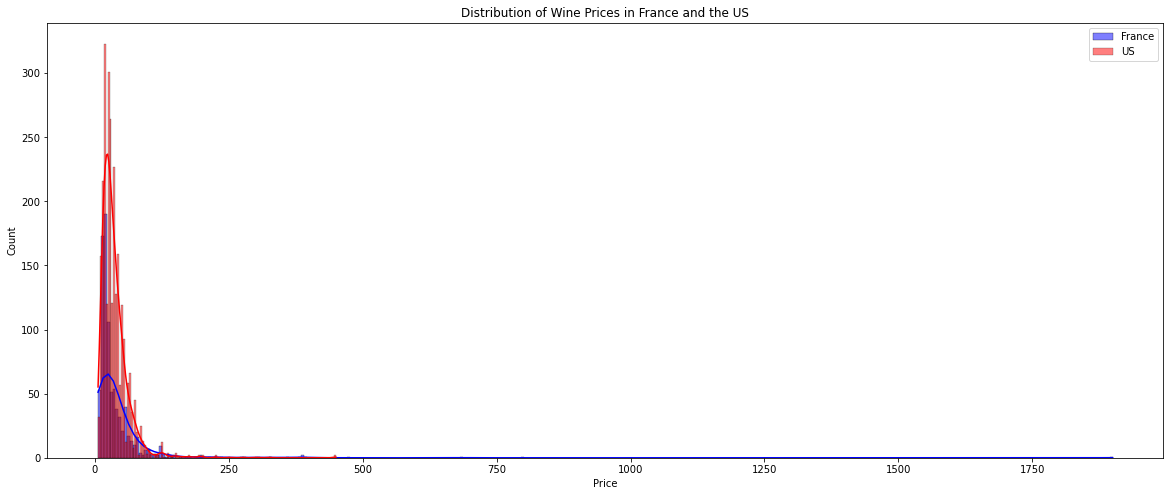

In [142]:
france_us_wines = df_sample[df_sample['country'].isin(['France', 'US'])]

plt.figure(figsize=(20,8))
sns.histplot(france_prices, color='blue', label='France', kde=True)
sns.histplot(us_prices, color='red', label='US', kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Wine Prices in France and the US')
plt.legend()
plt.show()

## Summary of investigation

It's hard to tell much about points given by wine tasters and the different varieties. Of the three tests of different tasters and different varieties, only one rejected the null hypothesis.

Regarding pricing of wines in given countries, with more exploration it might find that there wouldn't much difference in price, but between France and the US there is definitely shows a difference. Maybe this is due to how valued wine is in the the US compared to how common wine is in France?

The points granted in each country seem to also find no real difference. I'm guessing because the data doesn't have a huge difference in the range of points granted. No countries really had horrible wine said the tasters